In [1]:
from torchdiffeq import odeint_adjoint as odeint
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
from mpl_toolkits import mplot3d
from numpy import linalg as la
from scipy import stats
from scipy import spatial as sp
from scipy import integrate as integ
import pandas as pd
import torch
import torch.nn as nn
from tqdm import tqdm
from ipywidgets import interact, IntSlider

In [ ]:
#Neural ODE library
import NODE_Dynamic_Bifurcation_Parameter.Neural_ODEs_v1 as nodes
import NODE_Dynamic_Bifurcation_Parameter.DynamicalSystems as ds


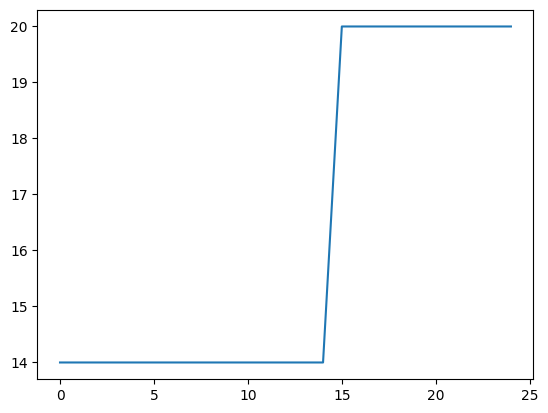

In [197]:
#r_vals = np.arange(14, 15, 1, dtype=np.float32)
r_vals = [14.0, 20.0]
def rho(t, r_vals = r_vals, step = 15):
    if t < step:
        return r_vals[0]
    elif t >= step:
        return r_vals[1]

plt.plot([rho(t) for t in range(0, 25)])

In [198]:
lorenz = ds.Lorenz(rho = rho)

#Generating data from Lorenz System with fixed parameters
dt = 0.05
initial_conditions = [[1.0, 1.0, 1.0], [-1.0, -1.0, 1.0]]
time_spans = [(0, 25)]
list = []

for t_span in time_spans:
    out = lorenz.solve(x0 = initial_conditions, t_span = t_span, dt = dt)
    list.append(np.expand_dims(out, axis=0))

data_full = np.concatenate(list, axis=0)
data_full.shape

(1, 500, 2, 3)

In [199]:
norm = nodes.normalize_data(data_full.reshape(-1, 3))
data_norm = norm.normalize(data_full)

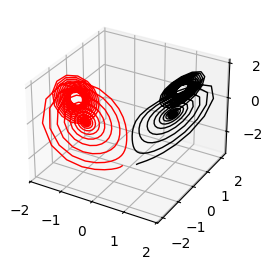

In [ ]:
fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
#ax1.set_title('r = '+str(r_list[2*index]), fontsize=14)
ax1.plot(xs=data_norm[0, :, 0, 0], ys=data_norm[0, :, 0, 1], zs=data_norm[0, :, 0, 2], color = 'black', linewidth = 1 )
ax1.plot(xs=data_norm[0, :, 1, 0], ys=data_norm[0, :, 1, 1], zs=data_norm[0, :, 1, 2], color = 'red', linewidth = 1)   


# Code for finding 1 breakpoint

In [201]:
#Selecting partitions to test
time_index = np.arange(0, data_norm.shape[1])

skip_index = 100
time_index_compute = np.arange(skip_index, data_norm.shape[1]-skip_index)

In [202]:
list = []
for p1 in time_index_compute:
    out1 = np.std(data_norm[0, :p1, 0, :])
    out2 = np.std(data_norm[0, p1:, 0, :])
    list.append(np.abs(out1 - out2))

list_2 = []
for p1 in time_index_compute:
    out1 = np.mean(data_norm[0, :p1, 0, :])
    out2 = np.mean(data_norm[0, p1:, 0, :])
    list_2.append(np.abs(out1 - out2))


Text(0.5, 0, 'Partition Location')

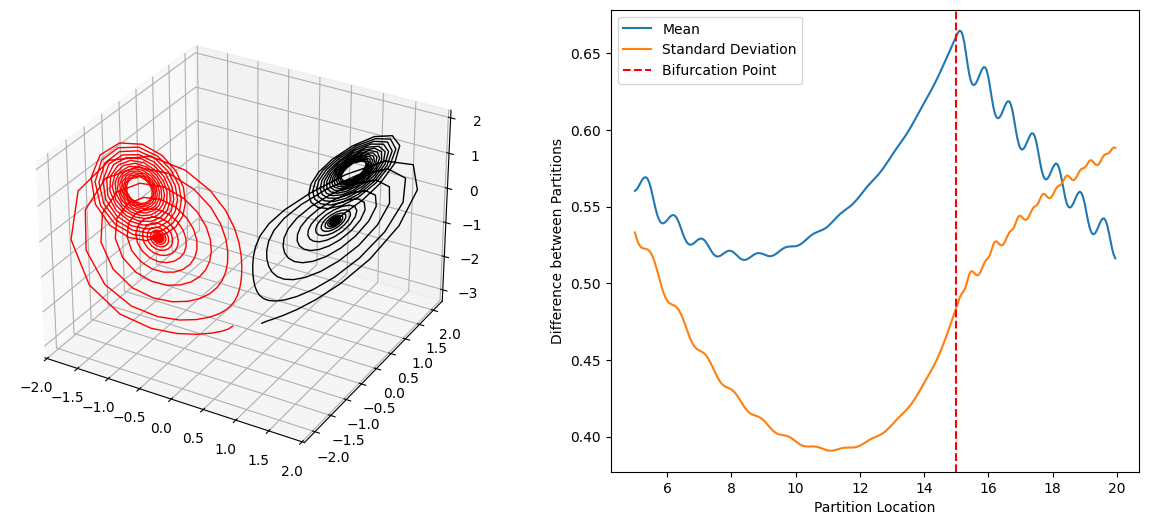

In [203]:

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
#ax1.set_title('r = '+str(r_list[2*index]), fontsize=14)
ax1.plot(xs=data_norm[0, :, 0, 0], ys=data_norm[0, :, 0, 1], zs=data_norm[0, :, 0, 2], color = 'black', linewidth = 1 )
ax1.plot(xs=data_norm[0, :, 1, 0], ys=data_norm[0, :, 1, 1], zs=data_norm[0, :, 1, 2], color = 'red', linewidth = 1)   



ax2 = fig.add_subplot(1, 2, 2)
partition_mean = np.array(list_2)
partition_std = np.array(list)

ax2.plot(time_index_compute*dt, partition_mean, label='Mean')
plt.plot(time_index_compute*dt, partition_std, label='Standard Deviation')
ax2.axvline(int(15), color='red', linestyle='--', label='Bifurcation Point')
ax2.legend()
ax2.set_ylabel('Difference between Partitions')
ax2.set_xlabel('Partition Location')
#plt.axvline(int(10/dt), color='red', linestyle='--')

# For n breakpoints

## Data Generation

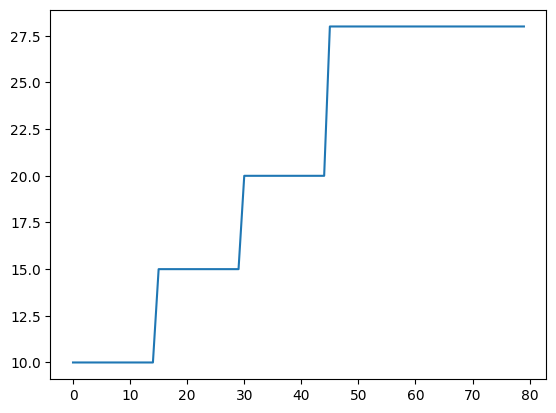

In [204]:
#r_vals = np.arange(14, 15, 1, dtype=np.float32)
r_vals = [10.0, 15.0, 20, 28.0]
def rho(t, r_vals = r_vals, step = 15):
    if t < step:
        return r_vals[0]
    elif t >= step and t < 2*step:
        return r_vals[1]
    elif t >= 2*step and t < 3*step:
        return r_vals[2]
    elif t >= 3*step:
        return r_vals[3]

plt.plot([rho(t) for t in range(0, 80)])

In [205]:
lorenz = ds.Lorenz(rho = rho)

#Generating data from Lorenz System with fixed parameters
dt = 0.05
initial_conditions = [[1.0, 1.0, 1.0], [-1.0, -1.0, 1.0]]
time_spans = [(0, 70)]
list = []

for t_span in time_spans:
    out = lorenz.solve(x0 = initial_conditions, t_span = t_span, dt = dt)
    list.append(np.expand_dims(out, axis=0))

data_full = np.concatenate(list, axis=0)
data_full.shape

(1, 1400, 2, 3)

In [206]:
norm = nodes.normalize_data(data_full.reshape(-1, 3))
data_norm = norm.normalize(data_full)

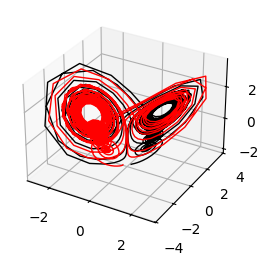

In [207]:
fig = plt.figure(figsize=(10, 15))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
#ax1.set_title('r = '+str(r_list[2*index]), fontsize=14)
ax1.plot(xs=data_norm[0, :, 0, 0], ys=data_norm[0, :, 0, 1], zs=data_norm[0, :, 0, 2], color = 'black', linewidth = 1 )
ax1.plot(xs=data_norm[0, :, 1, 0], ys=data_norm[0, :, 1, 1], zs=data_norm[0, :, 1, 2], color = 'red', linewidth = 1)   


## Computing partition measure

In [208]:
15/dt

300.0

In [214]:
#Selecting possible partitions to test. 
time_index = np.arange(0, data_norm.shape[1])
skip_index = 10
time_index_compute = np.arange(skip_index, data_norm.shape[1]-skip_index)

In [215]:
list = []
for p1 in time_index_compute:
        out1 = np.std(data_norm[0, :p1, 0, :])
        out2 = np.std(data_norm[0, p1:, 0, :])
        list.append(np.abs(out1 - out2))

In [216]:
list_2 = []
for p1 in time_index_compute:
    out1 = np.mean(data_norm[0, :p1, 0, :])
    out2 = np.mean(data_norm[0, p1:, 0, :])
    list_2.append(np.abs(out1 - out2))

In [217]:
bif_pts = np.array([15.0, 30.0, 45.0])

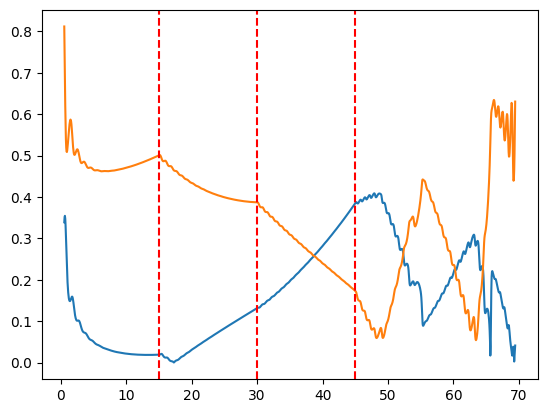

In [218]:
partition_measure = np.array(list)
partition_measure_2 = np.array(list_2)
plt.plot(time_index_compute*dt, partition_measure)
plt.plot(time_index_compute*dt, partition_measure_2)
for i in range(len(bif_pts)):
    plt.axvline(bif_pts[i], color='red', linestyle='--')

